<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Image Compression Using PCA

---

In this lab we are going to read in the Olivetti faces dataset, a set of photographs of faces. 

- First we are going to process and depict the images.
- Then we are going to use principal component analysis on the images to extract the most important parts.
- We will compare the images with reduced amount of information with the original ones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

 
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

np.set_printoptions(precision=4)

## Faces Dataset
---

Let's load in the Olivetti faces dataset from sklearn.

In [2]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()
print(dataset.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



### Load the Dataset


- There are 400 images of faces. (i.e. rows of data)
- Each image is 64x64 pixels, i.e. a total of 4096 pixels (i.e. features)

In [3]:
dataset = fetch_olivetti_faces()
faces = dataset.data
faces.shape

(400, 4096)

#### Let's look at a single observation

In [4]:
face10 = faces[10]
print((face10.shape))

# This is a grayscale image, so each pixel is from 0 (black) to 1 (white)
print(face10)

(4096,)
[0.5413 0.5868 0.6405 ... 0.095  0.1116 0.1116]


#### Set up a couple of functions, one to process an image (reshape it to a 2D matrix) and the other to actually plot the image matrix.

In [5]:
def plot_image_matrix(face_image):
    """ 
    Plots a grayscale 2-D ndarray `face_image`. 
        Pixel values can have any scale.
    """
    fig, ax = plt.subplots(figsize=(5,5))
    
    # max value (in magnitude)
    max_pixel_value = max(face_image.max(), -face_image.min())
    
    ax.imshow(face_image, cmap=plt.cm.gray,
              interpolation='nearest', 
              vmin=-max_pixel_value,
              vmax=max_pixel_value)
    
    ax.set_xticks(())
    ax.set_yticks(())

def process_image(image):
    """ 
    Standardize a 1-D 4096-element ndarray `image` to end up with:
      - A new 2-D 64x64-element ndarray, with
      - Pixel values between (-0.5, 0.5).
    """

    # Min-Max scaling to end up with values between (-0.5, 0.5)
    image = image.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(-0.5,0.5))
    image = scaler.fit_transform(image)

    
    # Convert the 4096-element `image` to 64x64
    image.shape = (64,64)
    return image

In [6]:
face10 = process_image(faces[10])
print((face10.shape))
print(face10)

(64, 64)
[[ 0.0291  0.0825  0.1456 ...  0.034   0.0437  0.0485]
 [ 0.0437  0.1165  0.165  ...  0.068   0.0777  0.0728]
 [ 0.0728  0.1602  0.1893 ...  0.0631  0.1019  0.0971]
 ...
 [-0.4563 -0.4466 -0.4466 ... -0.5    -0.4709 -0.4806]
 [-0.4515 -0.4466 -0.4515 ... -0.4951 -0.4757 -0.4806]
 [-0.4466 -0.4515 -0.4466 ... -0.4951 -0.4757 -0.4757]]


Given the image below and the image matrix above:
- The top rows are light colored.
    - So, the first few rows of numbers are > 0.0
- The final rows start dark and end dark. 
    - So, the last few rows of numbers start and end < 0.0
- If you print out the full final row, what would you expect the middle numbers to look like?

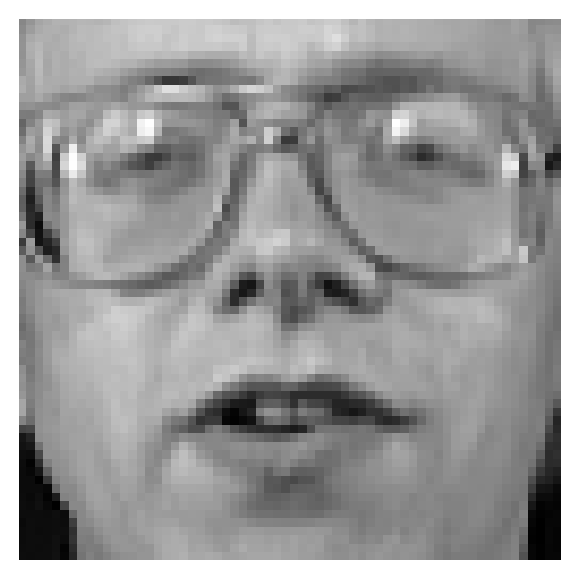

In [7]:
plot_image_matrix(process_image(face10))

#### Another picture

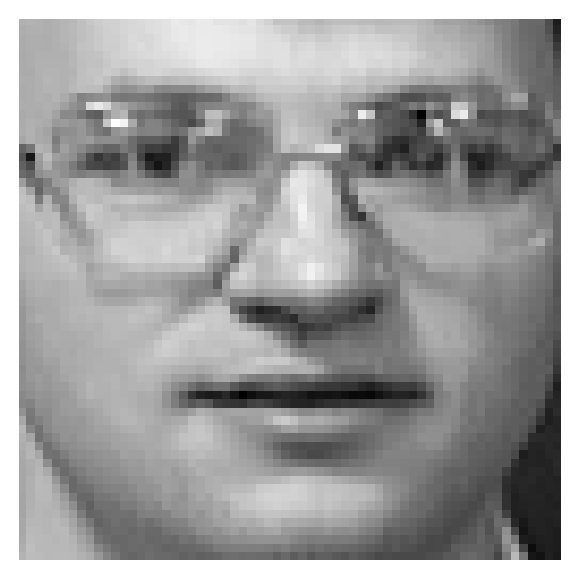

In [8]:
plot_image_matrix(process_image(faces[50]))

## PCA on the image

#### Take picture number 10 reshaped to 64 times 64 pixels

#### Transform to principal components

Limit the number of components as you find suitable.

- Instantiate PCA
- Fit and transform the image
- Extract the explained variance and the explained variance ratio

In [9]:
from sklearn.decomposition import PCA

#### Produce a scree plot

Plot the explained variance and the explained variance ratio versus the number of principal components.

#### Plot the transformed image in the (reduced) principal component coordinates 

#### Plot the matrix obtained with `pca.components` as an image

#### Apply the inverse transform to the transformed image. 

#### Plot the image obtained after inverse transform. Compare to the original image.

### Bonus: Apply clustering to the dataset with all images. Evaluate the assigned cluster labels against the true labels contained in `dataset.target`.

Hints:
- The original dataset contains faces of 40 different persons.
- Have a look at the different available distance metrics, e.g. `cosine`.

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

### Bonus: PCA transform the whole dataset and fit a logistic regression model

In [11]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV